# Initial set up

In [2]:
%pip install scikit-posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
from scipy import stats
import scikit_posthocs as sp

drive.mount('/content/drive')
%cd '/content/drive/My Drive/Programming/Data Science/PES-IMD/Aprendizado de Máquina/Trabalho/Trab_AM/gato-cachorro_classificacao_de_racas/'

sns.set_theme(style='darkgrid')

Mounted at /content/drive
/content/drive/My Drive/Programming/Data Science/PES-IMD/Aprendizado de Máquina/Trabalho/Trab_AM/gato-cachorro_classificacao_de_racas


In [4]:
path_to_accuracies = './accuracies/'

# Functions

In [14]:
def plot_avg_accuracies(filename,xlabel):
    df_knn = pd.read_csv(filename)
    df_knn.set_index(['dataset','train/test_type'],inplace=True)
    knn_means = df_knn.describe().loc['mean',:]
    ax = sns.lineplot(y=knn_means.values, x=knn_means.index)
    ax.set_ylabel('acc')
    ax.set_xlabel(xlabel)
    # image_name=filename.split('.')[0]
    # plt.savefig(f'{image_name}.pdf')
    
def plot_avg_df_accuracies(df_accuracies,xlabel):
    means = df_accuracies.describe().loc['mean',:]
    plt.figure(figsize=(10,6))
    ax = sns.lineplot(y=means.values, x=means.index.get_level_values(-1))
    ax.set_ylabel('Acurácia média')
    ax.set_xlabel(xlabel)
    # image_name=filename.split('.')[0]
    # plt.savefig(f'{image_name}.pdf')

def friedmanchisquare(df_accuracies):
    return stats.friedmanchisquare(*[df_accuracies[col] 
                                     for col in df_accuracies.columns])
def posthoc_nemenyi_friedman(df_accuracies):
    nemenyi_p =\
     sp.posthoc_nemenyi_friedman(np.array([df_accuracies[col]
                                           for col in df_accuracies.columns]).T)
    nemenyi_p.index = df_accuracies.columns.get_level_values(-1).tolist()
    nemenyi_p.columns = nemenyi_p.index
    return nemenyi_p

# Knn

In [32]:
df_knn = pd.read_csv(path_to_accuracies+'KNN_accuracies.csv',header=[0,1],
                     index_col=[0,1])
df_knn

KNN                              \
                              n_neighbors=1 n_neighbors=2 n_neighbors=3   
dataset       train/test_type                                             
normal_d=1764 70/30-HOLDOUT        0.346667      0.290000      0.313333   
              80/20-HOLDOUT        0.340000      0.325000      0.315000   
              90/10-HOLDOUT        0.320000      0.340000      0.360000   
              10-FOLD              0.343000      0.333000      0.340000   
normal_d=900  70/30-HOLDOUT        0.393333      0.370000      0.386667   
              80/20-HOLDOUT        0.430000      0.380000      0.405000   
              90/10-HOLDOUT        0.480000      0.380000      0.410000   
              10-FOLD              0.401000      0.395000      0.372000   
pca_d=459     70/30-HOLDOUT        0.330000      0.276667      0.300000   
              80/20-HOLDOUT        0.325000      0.285000      0.305000   
              90/10-HOLDOUT        0.320000      0.300000      0.330000   
              10-FOLD              0.350000      0.331000      0.330000   
noncorr_d=540 70/30-HOLDOUT        0.293333      0.286667      0.296667   
              80/20-HOLDOUT        0.330000      0.300000      0.295000   
              90/10-HOLDOUT        0.310000      0.340000      0.320000   
              10-FOLD              0.336000      0.319000      0.312000   

                                                           
                              n_neighbors=4 n_neighbors=5  
dataset       train/test_type                              
normal_d=1764 70/30-HOLDOUT        0.263333      0.280000  
              80/20-HOLDOUT        0.270000      0.275000  
              90/10-HOLDOUT        0.340000      0.330000  
              10-FOLD              0.324000      0.326000  
normal_d=900  70/30-HOLDOUT        0.363333      0.353333  
              80/20-HOLDOUT        0.380000      0.375000  
              90/10-HOLDOUT        0.500000      0.440000  
              10-FOLD              0.366000      0.354000  
pca_d=459     70/30-HOLDOUT        0.303333      0.296667  
              80/20-HOLDOUT        0.305000      0.275000  
              90/10-HOLDOUT        0.350000      0.310000  
              10-FOLD              0.339000      0.328000  
noncorr_d=540 70/30-HOLDOUT        0.293333      0.293333  
              80/20-HOLDOUT        0.275000      0.280000  
              90/10-HOLDOUT        0.310000      0.380000  
              10-FOLD              0.306000      0.329000

In [34]:
df_knn.describe()

KNN                                                        
      n_neighbors=1 n_neighbors=2 n_neighbors=3 n_neighbors=4 n_neighbors=5
count     16.000000     16.000000     16.000000     16.000000     16.000000
mean       0.353021      0.328208      0.336917      0.330521      0.326583
std        0.049007      0.037662      0.038317      0.057240      0.045815
min        0.293333      0.276667      0.295000      0.263333      0.275000
25%        0.323750      0.297500      0.310250      0.300833      0.290000
50%        0.338000      0.328000      0.325000      0.317000      0.327000
75%        0.360833      0.347500      0.363000      0.353333      0.353500
max        0.480000      0.395000      0.410000      0.500000      0.440000

## Graphics


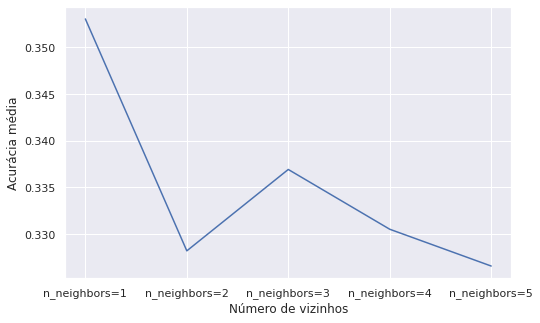

In [33]:
plot_avg_df_accuracies(df_knn,'Número de vizinhos')


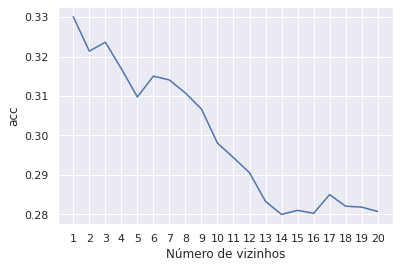

In [ ]:
file_name = path_to_accuracies+'knn_accuracies_new.csv'
plot_avg_accuracies(file_name,'Número de vizinhos')

## Statistical tests

In [92]:
friedmanchisquare(df_knn)

FriedmanchisquareResult(statistic=17.756410256410255, pvalue=0.0013769638667562607)

There is a chance of 0.138% of the null hypothesis (the populations are the same) being true. If our threshold to reject the null hipothesis is < 5%, we can conclude that there is enough evidence to reject the null hypothesis. Thus, we accept that the population of the four tested samples are different.

In [91]:
posthoc_nemenyi_friedman(df_knn)

,n_neighbors=1,n_neighbors=2,n_neighbors=3,n_neighbors=4,n_neighbors=5
n_neighbors=1,1.000000,0.048462,0.580482,0.025375,0.001687
n_neighbors=2,0.048462,1.000000,0.675658,0.900000,0.834289
n_neighbors=3,0.580482,0.675658,1.000000,0.548754,0.147310
n_neighbors=4,0.025375,0.900000,0.548754,1.000000,0.900000
n_neighbors=5,0.001687,0.834289,0.147310,0.900000,1.000000


Statistically similar pairs:
- (1,3); (2,3); (2,4); (2,5); (3,4); (3,5); (4,5);

Statistically different pairs:
- (1,2); (1,4); (1,5);

# Decision Tree

In [38]:
df_dt = pd.read_csv(path_to_accuracies+'DT_accuracies.csv',header=[0,1],
                     index_col=[0,1])
df_dt

DT                                      \
                              max_depth=3 max_depth=4 max_depth=5 max_depth=6   
dataset       train/test_type                                                   
normal_d=1764 70/30-HOLDOUT      0.316667    0.316667    0.313333    0.323333   
              80/20-HOLDOUT      0.300000    0.305000    0.290000    0.355000   
              90/10-HOLDOUT      0.350000    0.320000    0.310000    0.330000   
              10-FOLD            0.309000    0.319000    0.310000    0.311000   
normal_d=900  70/30-HOLDOUT      0.296667    0.350000    0.346667    0.333333   
              80/20-HOLDOUT      0.335000    0.360000    0.335000    0.340000   
              90/10-HOLDOUT      0.310000    0.340000    0.400000    0.440000   
              10-FOLD            0.311000    0.347000    0.377000    0.384000   
pca_d=459     70/30-HOLDOUT      0.360000    0.363333    0.326667    0.356667   
              80/20-HOLDOUT      0.325000    0.335000    0.375000    0.315000   
              90/10-HOLDOUT      0.340000    0.330000    0.360000    0.350000   
              10-FOLD            0.360000    0.353000    0.351000    0.321000   
noncorr_d=540 70/30-HOLDOUT      0.330000    0.313333    0.280000    0.303333   
              80/20-HOLDOUT      0.300000    0.305000    0.330000    0.305000   
              90/10-HOLDOUT      0.360000    0.300000    0.320000    0.340000   
              10-FOLD            0.300000    0.312000    0.287000    0.301000   

                                           
                              max_depth=7  
dataset       train/test_type              
normal_d=1764 70/30-HOLDOUT      0.280000  
              80/20-HOLDOUT      0.370000  
              90/10-HOLDOUT      0.350000  
              10-FOLD            0.334000  
normal_d=900  70/30-HOLDOUT      0.310000  
              80/20-HOLDOUT      0.365000  
              90/10-HOLDOUT      0.470000  
              10-FOLD            0.366000  
pca_d=459     70/30-HOLDOUT      0.313333  
              80/20-HOLDOUT      0.315000  
              90/10-HOLDOUT      0.330000  
              10-FOLD            0.312000  
noncorr_d=540 70/30-HOLDOUT      0.286667  
              80/20-HOLDOUT      0.285000  
              90/10-HOLDOUT      0.330000  
              10-FOLD            0.317000

In [39]:
df_dt.describe()

DT                                                
      max_depth=3 max_depth=4 max_depth=5 max_depth=6 max_depth=7
count   16.000000   16.000000   16.000000   16.000000   16.000000
mean     0.325208    0.329333    0.331979    0.338042    0.333375
std      0.023200    0.020813    0.034499    0.035419    0.046010
min      0.296667    0.300000    0.280000    0.301000    0.280000
25%      0.306750    0.313000    0.310000    0.314000    0.311500
50%      0.320833    0.325000    0.328333    0.331667    0.323500
75%      0.342500    0.347750    0.353250    0.351250    0.353750
max      0.360000    0.363333    0.400000    0.440000    0.470000

## Graphics

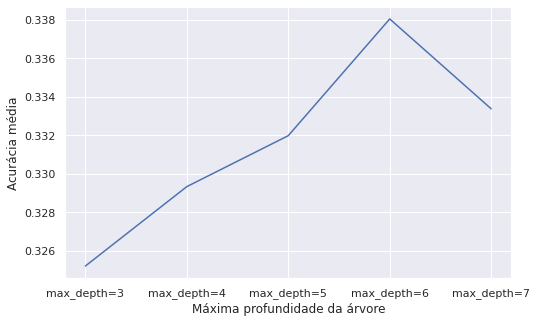

In [41]:
plot_avg_df_accuracies(df_dt,'Máxima profundidade da árvore')

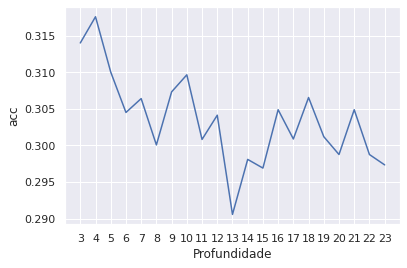

In [ ]:
file_name = path_to_accuracies+'dt_accuracies_new.csv'
plot_avg_accuracies(file_name,'Profundidade')

## Statistical tests

In [63]:
friedmanchisquare(df_dt)

FriedmanchisquareResult(statistic=2.573248407643347, pvalue=0.6315692897770462)

There is a chance of 63.16% of the null hypothesis (the populations are the same) being true. If our threshold to reject the null hipothesis is < 5%, we can conclude that there is not enough evidence to reject the null hypothesis. Thus, we accept that the population of the four tested samples are the same. This doesn't proven that the two populations are the same. But for a lack of evidence on the contrary we accept that they are the same. So the best choice is dictated by the greatest mean value, that, in this case is for max_depth = 6.

# Gaussian Naive Bayes

In [48]:
df_gnb = pd.read_csv(path_to_accuracies+'GNB_accuracies.csv',header=[0],
                     skiprows=[1,2],index_col=[0,1])
df_gnb

GNB
normal_d=1764 70/30-HOLDOUT  0.500000
              80/20-HOLDOUT  0.505000
              90/10-HOLDOUT  0.490000
              10-FOLD        0.507000
normal_d=900  70/30-HOLDOUT  0.556667
              80/20-HOLDOUT  0.585000
              90/10-HOLDOUT  0.630000
              10-FOLD        0.537000
pca_d=459     70/30-HOLDOUT  0.426667
              80/20-HOLDOUT  0.445000
              90/10-HOLDOUT  0.490000
              10-FOLD        0.415000
noncorr_d=540 70/30-HOLDOUT  0.500000
              80/20-HOLDOUT  0.500000
              90/10-HOLDOUT  0.470000
              10-FOLD        0.505000

In [50]:
df_gnb.describe()

,GNB
count,16.000000
mean,0.503896
std,0.054948
min,0.415000
25%,0.485000
50%,0.500000
75%,0.514500
max,0.630000


# MLP

## Activation

In [51]:
df_mlp_actv = pd.read_csv(path_to_accuracies+'MLP_actv_accuracies.csv',header=[0,1],
                     index_col=[0,1])
df_mlp_actv

MLP                      \
                              activation=identity activation=logistic   
dataset       train/test_type                                           
normal_d=1764 70/30-HOLDOUT              0.493333            0.513333   
              80/20-HOLDOUT              0.485000            0.495000   
              90/10-HOLDOUT              0.510000            0.540000   
              10-FOLD                    0.505000            0.539000   
normal_d=900  70/30-HOLDOUT              0.500000            0.523333   
              80/20-HOLDOUT              0.505000            0.550000   
              90/10-HOLDOUT              0.500000            0.540000   
              10-FOLD                    0.495000            0.526000   
pca_d=459     70/30-HOLDOUT              0.430000            0.456667   
              80/20-HOLDOUT              0.420000            0.460000   
              90/10-HOLDOUT              0.480000            0.470000   
              10-FOLD                    0.471000            0.490000   
noncorr_d=540 70/30-HOLDOUT              0.456667            0.466667   
              80/20-HOLDOUT              0.450000            0.485000   
              90/10-HOLDOUT              0.450000            0.470000   
              10-FOLD                    0.473000            0.493000   

                                                               
                              activation=tanh activation=relu  
dataset       train/test_type                                  
normal_d=1764 70/30-HOLDOUT          0.500000        0.533333  
              80/20-HOLDOUT          0.495000        0.540000  
              90/10-HOLDOUT          0.560000        0.590000  
              10-FOLD                0.542000        0.563000  
normal_d=900  70/30-HOLDOUT          0.506667        0.530000  
              80/20-HOLDOUT          0.545000        0.605000  
              90/10-HOLDOUT          0.640000        0.640000  
              10-FOLD                0.534000        0.569000  
pca_d=459     70/30-HOLDOUT          0.453333        0.463333  
              80/20-HOLDOUT          0.445000        0.465000  
              90/10-HOLDOUT          0.530000        0.470000  
              10-FOLD                0.507000        0.489000  
noncorr_d=540 70/30-HOLDOUT          0.480000        0.513333  
              80/20-HOLDOUT          0.510000        0.465000  
              90/10-HOLDOUT          0.510000        0.510000  
              10-FOLD                0.508000        0.529000

In [52]:
df_mlp_actv.describe()

MLP                                                    
      activation=identity activation=logistic activation=tanh activation=relu
count           16.000000           16.000000       16.000000       16.000000
mean             0.476500            0.501125        0.516625        0.529688
std              0.027996            0.032028        0.045172        0.053478
min              0.420000            0.456667        0.445000        0.463333
25%              0.455000            0.470000        0.498750        0.484250
50%              0.482500            0.494000        0.509000        0.529500
75%              0.500000            0.529250        0.536000        0.564500
max              0.510000            0.550000        0.640000        0.640000

### Graphics

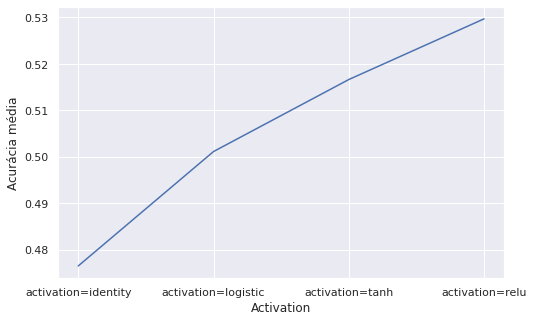

In [53]:
plot_avg_df_accuracies(df_mlp_actv,'Activation')

### Statistical test

In [62]:
friedmanchisquare(df_mlp_actv)

FriedmanchisquareResult(statistic=30.74999999999999, pvalue=9.595688624023438e-07)

In [78]:
posthoc_nemenyi_friedman(df_mlp_actv)

,activation=identity,activation=logistic,activation=tanh,activation=relu
activation=identity,1.000000,0.021029,0.001000,0.001000
activation=logistic,0.021029,1.000000,0.708703,0.077891
activation=tanh,0.001000,0.708703,1.000000,0.516551
activation=relu,0.001000,0.077891,0.516551,1.000000


Statistically similar pairs:
- (logistic,tanh); (logistic,relu); (tanh,relu);

Statistically different pairs:
- (identity,logistic); (identity,tanh); (identity,relu);

Thus, it's indifferent adopt logistic, tanh or relu, but the last one resulted the best average accuracy and will be chosen.

## Hidden layer sizes

In [113]:
df_mlp_hls = pd.read_csv(path_to_accuracies+'MLP_hls_accuracies.csv',
                         header=[0,1],index_col=[0,1])
second_level_split =\
[i.split(',') for i in df_mlp_hls.columns.get_level_values(1)]
df_mlp_hls.columns = pd.MultiIndex.from_tuples([(f'{col},{b[0]}',b[1].replace('hidden_layer_sizes=','')) 
for col,b in zip(df_mlp_hls.columns.get_level_values(0),second_level_split)])

df_mlp_hls

MLP,activation=relu                      \
                                                O        OA         A   
dataset       train/test_type                                           
normal_d=1764 70/30-HOLDOUT              0.436667  0.533333  0.516667   
              80/20-HOLDOUT              0.435000  0.545000  0.525000   
              90/10-HOLDOUT              0.540000  0.550000  0.530000   
              10-FOLD                    0.463000  0.570000  0.559000   
normal_d=900  70/30-HOLDOUT              0.463333  0.590000  0.556667   
              80/20-HOLDOUT              0.520000  0.570000  0.625000   
              90/10-HOLDOUT              0.540000  0.570000  0.580000   
              10-FOLD                    0.480000  0.574000  0.569000   
pca_d=459     70/30-HOLDOUT              0.323333  0.453333  0.463333   
              80/20-HOLDOUT              0.365000  0.420000  0.420000   
              90/10-HOLDOUT              0.440000  0.500000  0.520000   
              10-FOLD                    0.454000  0.488000  0.497000   
noncorr_d=540 70/30-HOLDOUT              0.460000  0.506667  0.510000   
              80/20-HOLDOUT              0.410000  0.505000  0.530000   
              90/10-HOLDOUT              0.490000  0.500000  0.510000   
              10-FOLD                    0.454000  0.519000  0.531000   

                                                   
                                     AT         T  
dataset       train/test_type                      
normal_d=1764 70/30-HOLDOUT    0.533333  0.513333  
              80/20-HOLDOUT    0.525000  0.525000  
              90/10-HOLDOUT    0.520000  0.530000  
              10-FOLD          0.560000  0.563000  
normal_d=900  70/30-HOLDOUT    0.526667  0.546667  
              80/20-HOLDOUT    0.600000  0.605000  
              90/10-HOLDOUT    0.600000  0.620000  
              10-FOLD          0.574000  0.581000  
pca_d=459     70/30-HOLDOUT    0.450000  0.453333  
              80/20-HOLDOUT    0.490000  0.480000  
              90/10-HOLDOUT    0.530000  0.510000  
              10-FOLD          0.502000  0.526000  
noncorr_d=540 70/30-HOLDOUT    0.540000  0.510000  
              80/20-HOLDOUT    0.500000  0.520000  
              90/10-HOLDOUT    0.540000  0.480000  
              10-FOLD          0.551000  0.530000

In [114]:
df_mlp_hls.describe()

MLP,activation=relu                                            
                        O         OA          A         AT          T
count           16.000000  16.000000  16.000000  16.000000  16.000000
mean             0.454646   0.524646   0.527667   0.533875   0.530833
std              0.057216   0.047149   0.047080   0.039045   0.044556
min              0.323333   0.420000   0.420000   0.450000   0.453333
25%              0.436250   0.500000   0.510000   0.515500   0.510000
50%              0.457000   0.526167   0.527500   0.531667   0.525500
75%              0.482500   0.570000   0.557250   0.553250   0.550750
max              0.540000   0.590000   0.625000   0.600000   0.620000

### Graphics

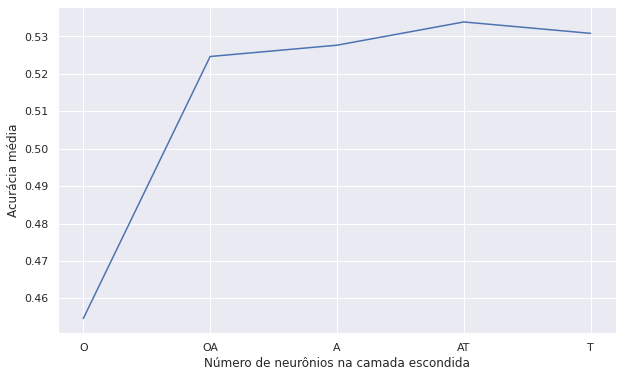

In [115]:
plot_avg_df_accuracies(df_mlp_hls,'Número de neurônios na camada escondida')

### Statistical tests

In [116]:
friedmanchisquare(df_mlp_hls)

FriedmanchisquareResult(statistic=25.440514469453397, pvalue=4.102274603642946e-05)

In [117]:
posthoc_nemenyi_friedman(df_mlp_hls)

,O,OA,A,AT,T
O,1.000000,0.002591,0.001,0.001,0.001
OA,0.002591,1.000000,0.900,0.900,0.900
A,0.001000,0.900000,1.000,0.900,0.900
AT,0.001000,0.900000,0.900,1.000,0.900
T,0.001000,0.900000,0.900,0.900,1.000


Statistically similar pairs:
- (OA,A); (OA,AT); (OA,T); (A,AT); (A,T); (AT,T);

Statistically different pairs:
- (O,OA); (O,A); (O,AT); (O,T);

Thus, it's indifferent to adopt OA, A, AT or T, but the first one was less time cosuming during traning phases and it was chosen.

## Max Iterations

In [124]:
df_mlp_max_it = pd.read_csv(path_to_accuracies+'MLP_it_accuracies.csv',
                         header=[0,1],index_col=[0,1])
second_level_split =\
[i.split(',') for i in df_mlp_max_it.columns.get_level_values(-1)]
df_mlp_max_it.columns = pd.MultiIndex.from_tuples([(f'{col},{",".join(b[:-1])}',b[-1].replace('max_iter=','')) 
for col,b in zip(df_mlp_max_it.columns.get_level_values(0),second_level_split)])

df_mlp_max_it

MLP,activation=relu,hidden_layer_sizes=OA  \
                                                                    100   
dataset       train/test_type                                             
normal_d=1764 70/30-HOLDOUT                                    0.520000   
              80/20-HOLDOUT                                    0.495000   
              90/10-HOLDOUT                                    0.540000   
              10-FOLD                                          0.564000   
normal_d=900  70/30-HOLDOUT                                    0.523333   
              80/20-HOLDOUT                                    0.600000   
              90/10-HOLDOUT                                    0.610000   
              10-FOLD                                          0.576000   
pca_d=459     70/30-HOLDOUT                                    0.366667   
              80/20-HOLDOUT                                    0.475000   
              90/10-HOLDOUT                                    0.510000   
              10-FOLD                                          0.496000   
noncorr_d=540 70/30-HOLDOUT                                    0.490000   
              80/20-HOLDOUT                                    0.490000   
              90/10-HOLDOUT                                    0.530000   
              10-FOLD                                          0.542000   

                                                   
                                   1000      5000  
dataset       train/test_type                      
normal_d=1764 70/30-HOLDOUT    0.506667  0.536667  
              80/20-HOLDOUT    0.515000  0.545000  
              90/10-HOLDOUT    0.540000  0.540000  
              10-FOLD          0.568000  0.576000  
normal_d=900  70/30-HOLDOUT    0.546667  0.556667  
              80/20-HOLDOUT    0.605000  0.605000  
              90/10-HOLDOUT    0.590000  0.610000  
              10-FOLD          0.571000  0.569000  
pca_d=459     70/30-HOLDOUT    0.463333  0.423333  
              80/20-HOLDOUT    0.455000  0.500000  
              90/10-HOLDOUT    0.430000  0.490000  
              10-FOLD          0.504000  0.483000  
noncorr_d=540 70/30-HOLDOUT    0.516667  0.486667  
              80/20-HOLDOUT    0.490000  0.510000  
              90/10-HOLDOUT    0.530000  0.520000  
              10-FOLD          0.543000  0.519000

In [133]:
df_mlp_max_it.describe()

MLP,activation=relu,hidden_layer_sizes=OA                      
                                            100       1000       5000
count                                 16.000000  16.000000  16.000000
mean                                   0.520500   0.523396   0.529396
std                                    0.057271   0.048643   0.048526
min                                    0.366667   0.430000   0.423333
25%                                    0.493750   0.500500   0.497500
50%                                    0.521667   0.523333   0.528333
75%                                    0.547500   0.552000   0.559750
max                                    0.610000   0.605000   0.610000

### Graphics

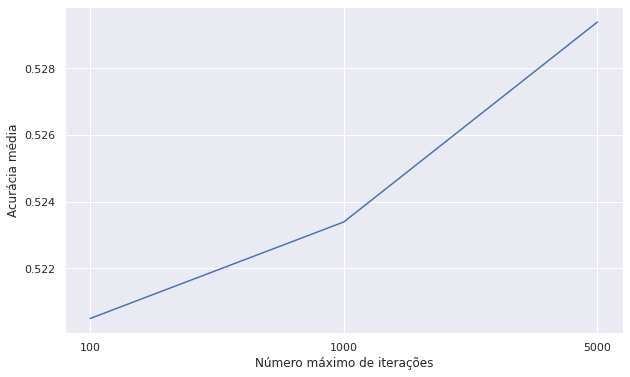

In [127]:
plot_avg_df_accuracies(df_mlp_max_it,'Número máximo de iterações')

### Statistical tests

In [129]:
friedmanchisquare(df_mlp_max_it)

FriedmanchisquareResult(statistic=0.75, pvalue=0.6872892787909721)

The set isn't statistically different because p-value=68.73% > 5%.
Thus it's statiscally indifferent choose one or other option. Therefore, max_it will be set to 1000, because, when we adopt max_it=100 some convergence issues were happening, althought this is the less time cosuming option during training phases.

## Learning rate

In [131]:
df_mlp_lr = pd.read_csv(path_to_accuracies+'MLP_lr_accuracies.csv',
                         header=[0,1],index_col=[0,1])
second_level_split =\
[i.split(',') for i in df_mlp_lr.columns.get_level_values(-1)]
df_mlp_lr.columns = pd.MultiIndex.from_tuples([(f'{col},{",".join(b[:-1])}',b[-1].replace('learning_rate_init=','')) 
for col,b in zip(df_mlp_lr.columns.get_level_values(0),second_level_split)])

df_mlp_lr

MLP,activation=relu,hidden_layer_sizes=OA,max_iter=1000  \
                                                                                0.001   
dataset       train/test_type                                                           
normal_d=1764 70/30-HOLDOUT                                             0.530000        
              80/20-HOLDOUT                                             0.525000        
              90/10-HOLDOUT                                             0.560000        
              10-FOLD                                                   0.577000        
normal_d=900  70/30-HOLDOUT                                             0.536667        
              80/20-HOLDOUT                                             0.600000        
              90/10-HOLDOUT                                             0.580000        
              10-FOLD                                                   0.574000        
pca_d=459     70/30-HOLDOUT                                             0.463333        
              80/20-HOLDOUT                                             0.425000        
              90/10-HOLDOUT                                             0.460000        
              10-FOLD                                                   0.466000        
noncorr_d=540 70/30-HOLDOUT                                             0.506667        
              80/20-HOLDOUT                                             0.485000        
              90/10-HOLDOUT                                             0.450000        
              10-FOLD                                                   0.534000        

                                                   
                                   0.01       0.1  
dataset       train/test_type                      
normal_d=1764 70/30-HOLDOUT    0.536667  0.486667  
              80/20-HOLDOUT    0.475000  0.465000  
              90/10-HOLDOUT    0.550000  0.560000  
              10-FOLD          0.552000  0.521000  
normal_d=900  70/30-HOLDOUT    0.526667  0.503333  
              80/20-HOLDOUT    0.585000  0.595000  
              90/10-HOLDOUT    0.620000  0.610000  
              10-FOLD          0.558000  0.523000  
pca_d=459     70/30-HOLDOUT    0.486667  0.470000  
              80/20-HOLDOUT    0.520000  0.450000  
              90/10-HOLDOUT    0.490000  0.510000  
              10-FOLD          0.512000  0.468000  
noncorr_d=540 70/30-HOLDOUT    0.493333  0.423333  
              80/20-HOLDOUT    0.510000  0.405000  
              90/10-HOLDOUT    0.520000  0.360000  
              10-FOLD          0.522000  0.483000

In [132]:
df_mlp_lr.describe()

MLP,activation=relu,hidden_layer_sizes=OA,max_iter=1000             \
                                                        0.001       0.01   
count                                          16.000000       16.000000   
mean                                            0.517042        0.528583   
std                                             0.053714        0.037993   
min                                             0.425000        0.475000   
25%                                             0.465333        0.505833   
50%                                             0.527500        0.521000   
75%                                             0.563500        0.550500   
max                                             0.600000        0.620000   

                  
             0.1  
count  16.000000  
mean    0.489583  
std     0.065670  
min     0.360000  
25%     0.461250  
50%     0.484833  
75%     0.521500  
max     0.610000

### Graphics

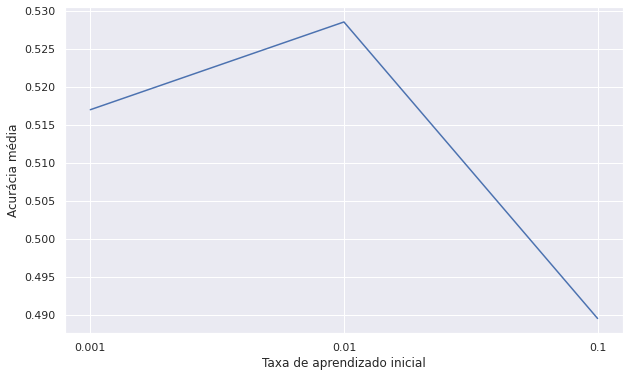

In [134]:
plot_avg_df_accuracies(df_mlp_lr,'Taxa de aprendizado inicial')

### Statistical tests

In [135]:
friedmanchisquare(df_mlp_lr)

FriedmanchisquareResult(statistic=5.555555555555555, pvalue=0.06217652402211632)

There is no statistical difference. So, it is indefferent to chose one value or other. Threrefore, the default value (0.001) will be adopted.

## Conclusion
Best configuration adopted:
- Activation function: relu
- Hidden layer sizes: OA
- Max number of iterations: 1000
- Initial learning rate: 0.001

# Bagging

## KNN

In [18]:
df_bagging_knn = pd.read_csv(path_to_accuracies+f'BAGGING_knn_accuracies.csv',header=[0,1],
                     index_col=[0,1])

second_level_split =\
[i.split(',') for i in df_bagging_knn.columns.get_level_values(-1)]
df_bagging_knn.columns =\
pd.MultiIndex.from_tuples([(f'{col},{",".join(b[:-2])}',
                            "/".join(b[-2:]).replace('n_estimators=','')\
                                     .replace('max_features=',''))
for col,b in zip(df_bagging_knn.columns.get_level_values(0),second_level_split)])

df_bagging_knn

BAGGING,base_estimator=KNeighborsClassifier(n_neighbors=3)  \
                                                                                  10/1.0   
dataset       train/test_type                                                              
normal_d=1764 70/30-HOLDOUT                                             0.290000           
              80/20-HOLDOUT                                             0.285000           
              90/10-HOLDOUT                                             0.350000           
              10-FOLD                                                   0.335000           
normal_d=900  70/30-HOLDOUT                                             0.363333           
              80/20-HOLDOUT                                             0.450000           
              90/10-HOLDOUT                                             0.480000           
              10-FOLD                                                   0.381000           
pca_d=459     70/30-HOLDOUT                                             0.283333           
              80/20-HOLDOUT                                             0.320000           
              90/10-HOLDOUT                                             0.350000           
              10-FOLD                                                   0.332000           
noncorr_d=540 70/30-HOLDOUT                                             0.283333           
              80/20-HOLDOUT                                             0.315000           
              90/10-HOLDOUT                                             0.350000           
              10-FOLD                                                   0.315000           

                                                             
                                 10/0.5    20/1.0    20/0.5  
dataset       train/test_type                                
normal_d=1764 70/30-HOLDOUT    0.316667  0.306667  0.333333  
              80/20-HOLDOUT    0.300000  0.310000  0.285000  
              90/10-HOLDOUT    0.320000  0.310000  0.310000  
              10-FOLD          0.342000  0.340000  0.328000  
normal_d=900  70/30-HOLDOUT    0.366667  0.370000  0.393333  
              80/20-HOLDOUT    0.410000  0.445000  0.410000  
              90/10-HOLDOUT    0.500000  0.520000  0.470000  
              10-FOLD          0.378000  0.386000  0.399000  
pca_d=459     70/30-HOLDOUT    0.303333  0.306667  0.283333  
              80/20-HOLDOUT    0.325000  0.285000  0.320000  
              90/10-HOLDOUT    0.310000  0.340000  0.340000  
              10-FOLD          0.335000  0.347000  0.330000  
noncorr_d=540 70/30-HOLDOUT    0.313333  0.313333  0.296667  
              80/20-HOLDOUT    0.260000  0.300000  0.300000  
              90/10-HOLDOUT    0.330000  0.340000  0.320000  
              10-FOLD          0.322000  0.321000  0.319000

Graphics

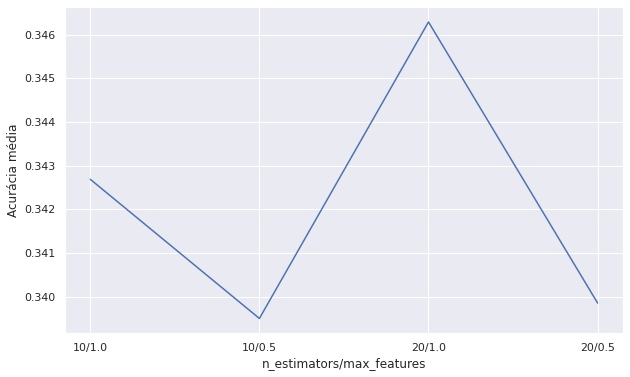

In [19]:
plot_avg_df_accuracies(df_bagging_knn,'n_estimators/max_features')

Statistical tests

In [20]:
friedmanchisquare(df_bagging_knn)

FriedmanchisquareResult(statistic=4.006578947368397, pvalue=0.26075459825947866)

There is no statistical difference between the samples. Thus, the n_estimators/max_features=20/1.0 will be chosen, since it has the best mean accuracy.

**Choosen: 20/1.0**

## DT

In [56]:
df_bagging_dt = pd.read_csv(path_to_accuracies+f'BAGGING_dt_accuracies.csv',header=[0,1],
                     index_col=[0,1])

second_level_split =\
[i.split(',') for i in df_bagging_dt.columns.get_level_values(-1)]
df_bagging_dt.columns =\
pd.MultiIndex.from_tuples([(f'{col},{",".join(b[:-2])}',
                            "/".join(b[-2:]).replace('n_estimators=','')\
                                     .replace('max_features=',''))
for col,b in zip(df_bagging_dt.columns.get_level_values(0),second_level_split)])

df_bagging_dt

BAGGING,base_estimator=DecisionTreeClassifier(max_depth=4)  \
                                                                                  10/1.0   
dataset       train/test_type                                                              
normal_d=1764 70/30-HOLDOUT                                             0.360000           
              80/20-HOLDOUT                                             0.420000           
              90/10-HOLDOUT                                             0.380000           
              10-FOLD                                                   0.396000           
normal_d=900  70/30-HOLDOUT                                             0.396667           
              80/20-HOLDOUT                                             0.480000           
              90/10-HOLDOUT                                             0.530000           
              10-FOLD                                                   0.418000           
pca_d=459     70/30-HOLDOUT                                             0.356667           
              80/20-HOLDOUT                                             0.395000           
              90/10-HOLDOUT                                             0.460000           
              10-FOLD                                                   0.395000           
noncorr_d=540 70/30-HOLDOUT                                             0.356667           
              80/20-HOLDOUT                                             0.340000           
              90/10-HOLDOUT                                             0.450000           
              10-FOLD                                                   0.401000           

                                                             
                                 10/0.5    20/1.0    20/0.5  
dataset       train/test_type                                
normal_d=1764 70/30-HOLDOUT    0.403333  0.416667  0.420000  
              80/20-HOLDOUT    0.370000  0.420000  0.445000  
              90/10-HOLDOUT    0.410000  0.500000  0.520000  
              10-FOLD          0.417000  0.422000  0.433000  
normal_d=900  70/30-HOLDOUT    0.413333  0.440000  0.423333  
              80/20-HOLDOUT    0.455000  0.480000  0.515000  
              90/10-HOLDOUT    0.490000  0.440000  0.470000  
              10-FOLD          0.413000  0.448000  0.440000  
pca_d=459     70/30-HOLDOUT    0.370000  0.403333  0.386667  
              80/20-HOLDOUT    0.335000  0.395000  0.380000  
              90/10-HOLDOUT    0.380000  0.400000  0.440000  
              10-FOLD          0.367000  0.405000  0.412000  
noncorr_d=540 70/30-HOLDOUT    0.383333  0.353333  0.386667  
              80/20-HOLDOUT    0.315000  0.450000  0.410000  
              90/10-HOLDOUT    0.440000  0.490000  0.400000  
              10-FOLD          0.393000  0.411000  0.444000

Graphics

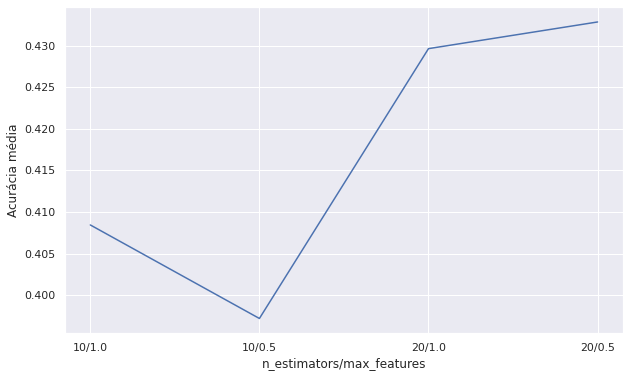

In [57]:
plot_avg_df_accuracies(df_bagging_dt,'n_estimators/max_features')

Statistical tests

In [23]:
friedmanchisquare(df_bagging_dt)

FriedmanchisquareResult(statistic=16.29936305732482, pvalue=0.0009844691861733649)

There is statistical difference between the samples.

In [24]:
posthoc_nemenyi_friedman(df_bagging_dt)

,10/1.0,10/0.5,20/1.0,20/0.5
10/1.0,1.000000,0.631841,0.283091,0.077891
10/0.5,0.631841,1.000000,0.017085,0.002100
20/1.0,0.283091,0.017085,1.000000,0.900000
20/0.5,0.077891,0.002100,0.900000,1.000000


Statistically similar pairs:
- (10/1.0,10/0.5); (10/1.0,20/1.0); (10/1.0,20/0.5); (20/1.0,20/0.5);

Statistically different pairs:
- (10/0.5,20/1.0); (10/0.5,20/0.5);

Thus, it's indifferent to adopt 10/1.0, 20/1.0 or 20/0.5, but this last one has the best mean accuracy.

**Choosen: 20/0.5**

## GNB

In [26]:
df_bagging_gnb = pd.read_csv(path_to_accuracies+f'BAGGING_nb_accuracies.csv',header=[0,1],
                     index_col=[0,1])

second_level_split =\
[i.split(',') for i in df_bagging_gnb.columns.get_level_values(-1)]
df_bagging_gnb.columns =\
pd.MultiIndex.from_tuples([(f'{col},{",".join(b[:-2])}',
                            "/".join(b[-2:]).replace('n_estimators=','')\
                                     .replace('max_features=',''))
for col,b in zip(df_bagging_gnb.columns.get_level_values(0),second_level_split)])

df_bagging_gnb

BAGGING,base_estimator=GaussianNB()            \
                                                           10/1.0    10/0.5   
dataset       train/test_type                                                 
normal_d=1764 70/30-HOLDOUT                              0.513333  0.490000   
              80/20-HOLDOUT                              0.500000  0.515000   
              90/10-HOLDOUT                              0.450000  0.470000   
              10-FOLD                                    0.507000  0.500000   
normal_d=900  70/30-HOLDOUT                              0.550000  0.543333   
              80/20-HOLDOUT                              0.615000  0.590000   
              90/10-HOLDOUT                              0.630000  0.650000   
              10-FOLD                                    0.534000  0.526000   
pca_d=459     70/30-HOLDOUT                              0.413333  0.403333   
              80/20-HOLDOUT                              0.440000  0.445000   
              90/10-HOLDOUT                              0.470000  0.480000   
              10-FOLD                                    0.427000  0.406000   
noncorr_d=540 70/30-HOLDOUT                              0.493333  0.500000   
              80/20-HOLDOUT                              0.495000  0.500000   
              90/10-HOLDOUT                              0.460000  0.420000   
              10-FOLD                                    0.498000  0.500000   

                                                   
                                 20/1.0    20/0.5  
dataset       train/test_type                      
normal_d=1764 70/30-HOLDOUT    0.490000  0.510000  
              80/20-HOLDOUT    0.510000  0.525000  
              90/10-HOLDOUT    0.500000  0.500000  
              10-FOLD          0.512000  0.515000  
normal_d=900  70/30-HOLDOUT    0.540000  0.550000  
              80/20-HOLDOUT    0.565000  0.580000  
              90/10-HOLDOUT    0.640000  0.630000  
              10-FOLD          0.533000  0.530000  
pca_d=459     70/30-HOLDOUT    0.416667  0.393333  
              80/20-HOLDOUT    0.445000  0.390000  
              90/10-HOLDOUT    0.480000  0.480000  
              10-FOLD          0.404000  0.400000  
noncorr_d=540 70/30-HOLDOUT    0.500000  0.496667  
              80/20-HOLDOUT    0.505000  0.520000  
              90/10-HOLDOUT    0.460000  0.450000  
              10-FOLD          0.487000  0.488000

Graphics

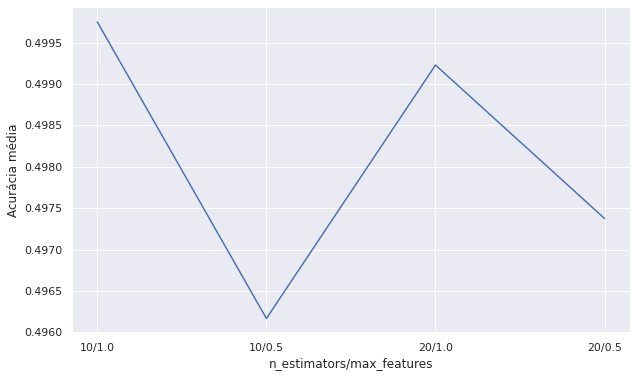

In [27]:
plot_avg_df_accuracies(df_bagging_gnb,'n_estimators/max_features')

Statistical tests

In [28]:
friedmanchisquare(df_bagging_gnb)

FriedmanchisquareResult(statistic=0.12080536912749847, pvalue=0.989228825726344)

There is no statistical difference between the samples. Thus, the n_estimators/max_features=10/1.0 will be chosen, since it has the best mean accuracy.

**Choosen: 10/1.0**

## MLP

In [30]:
df_bagging_mlp = pd.read_csv(path_to_accuracies+f'BAGGING_mlp_accuracies.csv',header=[0,1],
                     index_col=[0,1])

second_level_split =\
[i.split(',') for i in df_bagging_mlp.columns.get_level_values(-1)]
df_bagging_mlp.columns =\
pd.MultiIndex.from_tuples([(f'{col},{",".join(b[0:1]+b[-2:])}',
                            "/".join(b[-4:-2]).replace('n_estimators=','')\
                                     .replace('max_features=',''))
for col,b in zip(df_bagging_mlp.columns.get_level_values(0),second_level_split)])

df_bagging_mlp

BAGGING,base_estimator=MLPClassifier(max_iter=1000),base_estimator__hidden_layer_sizes=OA,n_jobs=-1  \
                                                                                                                           10/1.0   
dataset       train/test_type                                                                                                       
normal_d=1764 70/30-HOLDOUT                                             0.523333                                                    
              80/20-HOLDOUT                                             0.565000                                                    
              90/10-HOLDOUT                                             0.510000                                                    
              10-FOLD                                                   0.566000                                                    
normal_d=900  70/30-HOLDOUT                                             0.583333                                                    
              80/20-HOLDOUT                                             0.610000                                                    
              90/10-HOLDOUT                                             0.630000                                                    
              10-FOLD                                                   0.585000                                                    
pca_d=459     70/30-HOLDOUT                                             0.496667                                                    
              80/20-HOLDOUT                                             0.515000                                                    
              90/10-HOLDOUT                                             0.530000                                                    
              10-FOLD                                                   0.545000                                                    
noncorr_d=540 70/30-HOLDOUT                                             0.510000                                                    
              80/20-HOLDOUT                                             0.520000                                                    
              90/10-HOLDOUT                                             0.550000                                                    
              10-FOLD                                                   0.546000                                                    

                                                             
                                 10/0.5    20/1.0    20/0.5  
dataset       train/test_type                                
normal_d=1764 70/30-HOLDOUT    0.526667  0.530000  0.540000  
              80/20-HOLDOUT    0.525000  0.550000  0.545000  
              90/10-HOLDOUT    0.520000  0.530000  0.540000  
              10-FOLD          0.573000  0.572000  0.569000  
normal_d=900  70/30-HOLDOUT    0.563333  0.573333  0.563333  
              80/20-HOLDOUT    0.605000  0.605000  0.610000  
              90/10-HOLDOUT    0.610000  0.620000  0.590000  
              10-FOLD          0.579000  0.569000  0.588000  
pca_d=459     70/30-HOLDOUT    0.456667  0.503333  0.470000  
              80/20-HOLDOUT    0.445000  0.515000  0.495000  
              90/10-HOLDOUT    0.490000  0.550000  0.500000  
              10-FOLD          0.477000  0.532000  0.517000  
noncorr_d=540 70/30-HOLDOUT    0.520000  0.526667  0.500000  
              80/20-HOLDOUT    0.510000  0.515000  0.520000  
              90/10-HOLDOUT    0.570000  0.540000  0.480000  
              10-FOLD          0.529000  0.557000  0.552000

Graphics

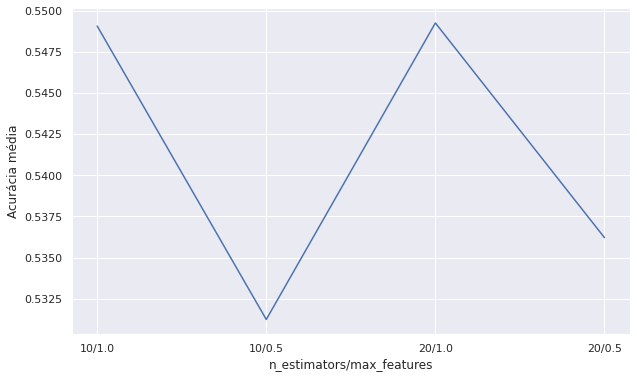

In [31]:
plot_avg_df_accuracies(df_bagging_mlp,'n_estimators/max_features')

Statistical tests

In [32]:
friedmanchisquare(df_bagging_mlp)

FriedmanchisquareResult(statistic=7.838709677419355, pvalue=0.04946539533596238)

There is statistical difference between the samples.

In [33]:
posthoc_nemenyi_friedman(df_bagging_mlp)

,10/1.0,10/0.5,20/1.0,20/0.5
10/1.0,1.000000,0.107756,0.900000,0.747133
10/0.5,0.107756,1.000000,0.065622,0.554984
20/1.0,0.900000,0.065622,1.000000,0.631841
20/0.5,0.747133,0.554984,0.631841,1.000000


Statistically similar pairs:
- (10/1.0,10/0.5); (10/1.0,20/1.0); (10/1.0,20/0.5); (10/0.5,20/1.0); (10/0.5,20/0.5); (20/1.0,20/0.5);

Thus, it's indifferent to adopt 10/1.0, 10/0.5, 20/1.0 or 20/0.5, but the first one has the best mean accuracy.

**Choosen: 10/1.0**

# Boosting

## DT

In [37]:
df_boosting_dt = pd.read_csv(path_to_accuracies+f'BOOSTING_dt_accuracies.csv',header=[0,1],
                     index_col=[0,1])

second_level_split =\
[i.split(',') for i in df_boosting_dt.columns.get_level_values(-1)]
df_boosting_dt.columns =\
pd.MultiIndex.from_tuples([(f'{col},{",".join(b[:-1])}',
                            "/".join(b[-1:]).replace('n_estimators=','')\
                                     .replace('max_features=',''))
for col,b in zip(df_boosting_dt.columns.get_level_values(0),second_level_split)])

df_boosting_dt

BOOSTING,base_estimator=DecisionTreeClassifier(max_depth=4)  \
                                                                                       10   
dataset       train/test_type                                                               
normal_d=1764 70/30-HOLDOUT                                             0.283333            
              80/20-HOLDOUT                                             0.355000            
              90/10-HOLDOUT                                             0.270000            
              10-FOLD                                                   0.330000            
normal_d=900  70/30-HOLDOUT                                             0.383333            
              80/20-HOLDOUT                                             0.300000            
              90/10-HOLDOUT                                             0.290000            
              10-FOLD                                                   0.339000            
pca_d=459     70/30-HOLDOUT                                             0.300000            
              80/20-HOLDOUT                                             0.235000            
              90/10-HOLDOUT                                             0.310000            
              10-FOLD                                                   0.297000            
noncorr_d=540 70/30-HOLDOUT                                             0.276667            
              80/20-HOLDOUT                                             0.315000            
              90/10-HOLDOUT                                             0.380000            
              10-FOLD                                                   0.321000            

                                         
                                     20  
dataset       train/test_type            
normal_d=1764 70/30-HOLDOUT    0.326667  
              80/20-HOLDOUT    0.330000  
              90/10-HOLDOUT    0.240000  
              10-FOLD          0.319000  
normal_d=900  70/30-HOLDOUT    0.296667  
              80/20-HOLDOUT    0.355000  
              90/10-HOLDOUT    0.340000  
              10-FOLD          0.339000  
pca_d=459     70/30-HOLDOUT    0.280000  
              80/20-HOLDOUT    0.195000  
              90/10-HOLDOUT    0.270000  
              10-FOLD          0.298000  
noncorr_d=540 70/30-HOLDOUT    0.320000  
              80/20-HOLDOUT    0.310000  
              90/10-HOLDOUT    0.310000  
              10-FOLD          0.323000

### Graphics

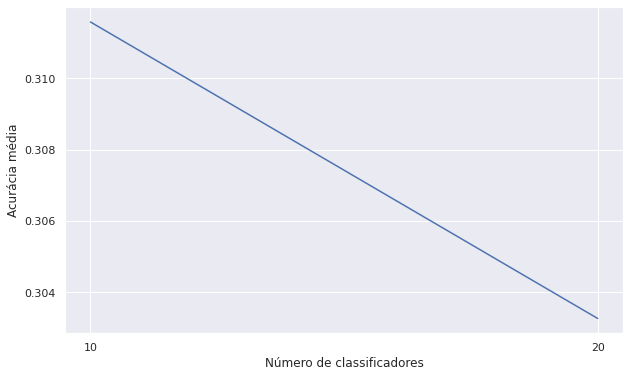

In [39]:
plot_avg_df_accuracies(df_boosting_dt,'Número de classificadores')

### Statistical tests

In [41]:
posthoc_nemenyi_friedman(df_boosting_dt)

,10,20
10,1.000000,0.627173
20,0.627173,1.000000


There is no statistical difference but boosting with 10 estimators resulted in a better performance.

**Chose: n_estimators = 10**

## GNB

In [42]:
df_boosting_gnb = pd.read_csv(path_to_accuracies+f'BOOSTING_nb_accuracies.csv',header=[0,1],
                     index_col=[0,1])

second_level_split =\
[i.split(',') for i in df_boosting_gnb.columns.get_level_values(-1)]
df_boosting_gnb.columns =\
pd.MultiIndex.from_tuples([(f'{col},{",".join(b[:-1])}',
                            "/".join(b[-1:]).replace('n_estimators=','')\
                                     .replace('max_features=',''))
for col,b in zip(df_boosting_gnb.columns.get_level_values(0),second_level_split)])

df_boosting_gnb

BOOSTING,base_estimator=GaussianNB()          
                                                                10        20
dataset       train/test_type                                               
normal_d=1764 70/30-HOLDOUT                               0.316667  0.363333
              80/20-HOLDOUT                               0.320000  0.220000
              90/10-HOLDOUT                               0.270000  0.160000
              10-FOLD                                     0.241000  0.256000
normal_d=900  70/30-HOLDOUT                               0.340000  0.216667
              80/20-HOLDOUT                               0.330000  0.290000
              90/10-HOLDOUT                               0.280000  0.190000
              10-FOLD                                     0.274000  0.262000
pca_d=459     70/30-HOLDOUT                               0.216667  0.233333
              80/20-HOLDOUT                               0.245000  0.220000
              90/10-HOLDOUT                               0.280000  0.300000
              10-FOLD                                     0.223000  0.253000
noncorr_d=540 70/30-HOLDOUT                               0.270000  0.276667
              80/20-HOLDOUT                               0.300000  0.345000
              90/10-HOLDOUT                               0.360000  0.260000
              10-FOLD                                     0.253000  0.271000

### Graphics

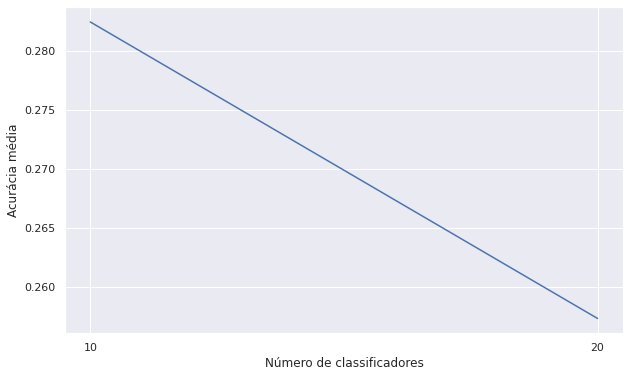

In [43]:
plot_avg_df_accuracies(df_boosting_gnb,'Número de classificadores')

### Statistical tests

In [44]:
posthoc_nemenyi_friedman(df_boosting_gnb)

,10,20
10,1.0,0.9
20,0.9,1.0


There is no statistical difference but boosting with 10 estimators resulted in a better performance.

**Chose: n_estimators = 10**

# Random forest

In [49]:
df_rf = pd.read_csv(path_to_accuracies+f'RANDOM_FOREST_accuracies.csv',header=[0,1],
                     index_col=[0,1])

df_rf.columns = [col.replace('n_estimators=','').replace('criterion=','')\
                 .replace(',','/')
                 for col in df_rf.columns.get_level_values(-1)]

df_rf

10/gini  10/entropy  100/gini  100/entropy
dataset       train/test_type                                             
normal_d=1764 70/30-HOLDOUT    0.370000    0.390000  0.483333     0.480000
              80/20-HOLDOUT    0.385000    0.355000  0.530000     0.570000
              90/10-HOLDOUT    0.370000    0.420000  0.590000     0.520000
              10-FOLD          0.361000    0.362000  0.528000     0.531000
normal_d=900  70/30-HOLDOUT    0.356667    0.346667  0.510000     0.510000
              80/20-HOLDOUT    0.395000    0.415000  0.610000     0.590000
              90/10-HOLDOUT    0.430000    0.400000  0.600000     0.580000
              10-FOLD          0.404000    0.409000  0.542000     0.532000
pca_d=459     70/30-HOLDOUT    0.246667    0.283333  0.363333     0.326667
              80/20-HOLDOUT    0.305000    0.250000  0.400000     0.405000
              90/10-HOLDOUT    0.330000    0.240000  0.450000     0.430000
              10-FOLD          0.269000    0.303000  0.387000     0.411000
noncorr_d=540 70/30-HOLDOUT    0.323333    0.363333  0.450000     0.450000
              80/20-HOLDOUT    0.340000    0.340000  0.530000     0.510000
              90/10-HOLDOUT    0.320000    0.330000  0.500000     0.510000
              10-FOLD          0.358000    0.348000  0.492000     0.501000

In [50]:
df_rf.describe()

,10/gini,10/entropy,100/gini,100/entropy
count,16.000000,16.000000,16.000000,16.000000
mean,0.347729,0.347208,0.497854,0.491042
std,0.048227,0.055496,0.073649,0.070989
min,0.246667,0.240000,0.363333,0.326667
25%,0.322500,0.323250,0.450000,0.445000
50%,0.357333,0.351500,0.505000,0.510000
75%,0.373750,0.392500,0.533000,0.531250
max,0.430000,0.420000,0.610000,0.590000


## Graphics

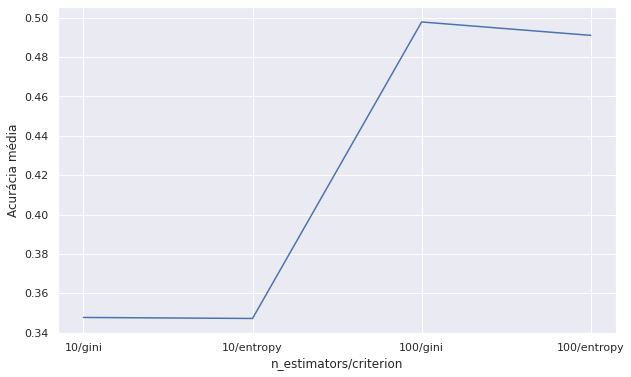

In [52]:
plot_avg_df_accuracies(df_rf,'n_estimators/criterion')

## Statistical tests

In [53]:
friedmanchisquare(df_rf)

FriedmanchisquareResult(statistic=39.38216560509556, pvalue=1.440444914047935e-08)

In [55]:
posthoc_nemenyi_friedman(df_rf)

,10/gini,10/entropy,100/gini,100/entropy
10/gini,1.000,0.900,0.001,0.001
10/entropy,0.900,1.000,0.001,0.001
100/gini,0.001,0.001,1.000,0.900
100/entropy,0.001,0.001,0.900,1.000


Statistically similar pairs:
- (10/gini,10/entropy); (10/entropy,20/1.0); (100/gini,100/entropy);

Statistically different pairs:
- (10/gini,100/gini); (10/gini,100/entropy); (10/entropy,100/gini); (10/entropy,100/entropy);

Thus, it's indifferent to adopt  (100/gini,100/entropy), but the first one has the best mean accuracy.

**Choosen: 100/gini**

# Stacking

In [62]:
df_rf = pd.read_csv(path_to_accuracies+f'STACKING_accuracies.csv',header=[0,1],
                     index_col=[0,1])

df_rf.columns =\
pd.MultiIndex.from_tuples([('STACKING',n)
                           for col,n in zip(df_rf.columns.get_level_values(-1),
                           ['MLP,KNN,GNB','5MLP,5KNN','9MLP,10KNN,GNB'])])

df_rf

STACKING                         
                              MLP,KNN,GNB 5MLP,5KNN 9MLP,10KNN,GNB
dataset       train/test_type                                     
normal_d=1764 70/30-HOLDOUT      0.536667  0.510000       0.503333
              80/20-HOLDOUT      0.530000  0.515000       0.515000
              90/10-HOLDOUT      0.570000  0.580000       0.590000
              10-FOLD            0.562000  0.581000       0.552000
normal_d=900  70/30-HOLDOUT      0.543333  0.583333       0.576667
              80/20-HOLDOUT      0.640000  0.610000       0.585000
              90/10-HOLDOUT      0.650000  0.650000       0.670000
              10-FOLD            0.587000  0.587000       0.577000
pca_d=459     70/30-HOLDOUT      0.486667  0.466667       0.453333
              80/20-HOLDOUT      0.510000  0.465000       0.470000
              90/10-HOLDOUT      0.500000  0.530000       0.520000
              10-FOLD            0.536000  0.524000       0.531000
noncorr_d=540 70/30-HOLDOUT      0.523333  0.503333       0.513333
              80/20-HOLDOUT      0.520000  0.490000       0.530000
              90/10-HOLDOUT      0.560000  0.480000       0.510000
              10-FOLD            0.560000  0.539000       0.519000

## Graphics

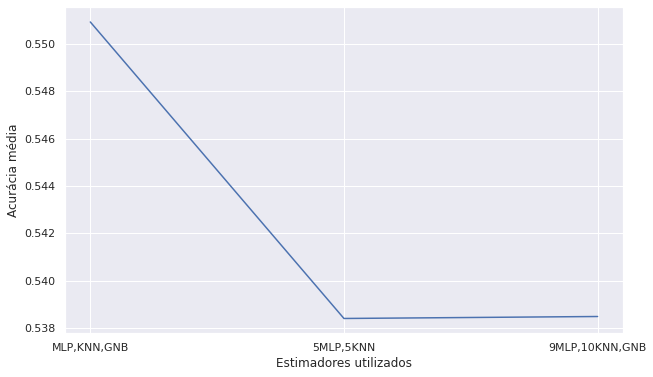

In [64]:
plot_avg_df_accuracies(df_rf,'Estimadores utilizados')

## Statistical tests

In [65]:
friedmanchisquare(df_rf)

FriedmanchisquareResult(statistic=3.0, pvalue=0.22313016014842982)

There is no statical difference. It's better to adopt the first configuration with 3 estimators, since it has fewer estimators and the best mean accuracy.

Chose: MLP,KNN,GNB